# IMPORTANT

# First: Save a copy of this file with your initials at the end.

## Delete the end of the filename, and replace with your initials.

## When your branch is merged, you will have your own file added to the folder

---

# Use this as your first Jupyter Notebook to run.

### 1. Add your name in the markup section below

### 2. Add some code chunks and add some python code. Could be anything, but if you havent used a jupyter notebook, it will be a chance for you to practice.

### 3. Run this notebook to make sure it works in your development environment.

### 4. Save and you will have the changes in the branch you just created. 


### 5. Create a commit from github desktop and give details as to what has changed in the box required.

### 6. Then Push to origin.

### 7. Next make a pull request for the changes in your branch to be reviewed. Make sure your changes are clearly documented.

### 8. Once the pull request has been approved, your changes and this document will not be on the main repo.


## My name is: Joel Paul varghese



In [20]:
print("Very excited to start this project")

Very excited to start this project


--- 
## The original tutorial file begins below

--- 



# Introduction to working with Audio in Data Science

<strong>By: Daniel Gladman, November 2022. </strong>

This tutorial will aim to guide data scientists who are new to working with audio data and would like to learn some basic concepts for loading and visualizing audio data.

I will begin by explaining some key concepts that you will need to understand before you begin working with audio data.

## Fundamental Elements
There are many factors to consider when working with audio data. However, I will describe four that I feel cover the very basics. <br>
These are:

* Frequency
* Intensity
* Sample Rate
* Bit depth / Bit rate

#### Frequency (Hz)

Describes the distance between waves, or the wave lengths. Every sound will have a wave length and depending on this may or may not be able to be heard by human ears

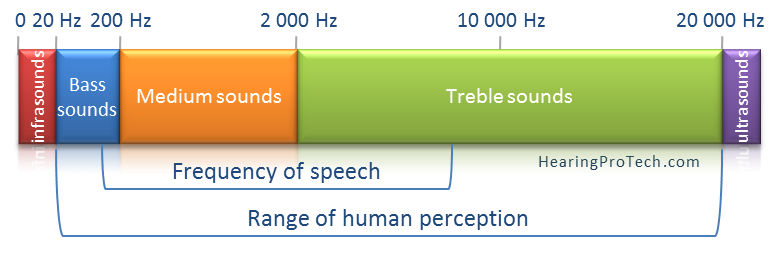

Shorter frequencies refer to higher pitches and Longer frequencies refer to lower pitchs

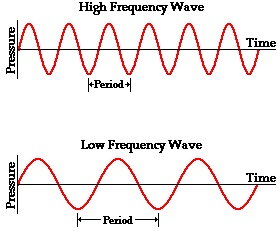

#### Intensity (db)

The height of the wave is the amplitude and this refers to the volume. 

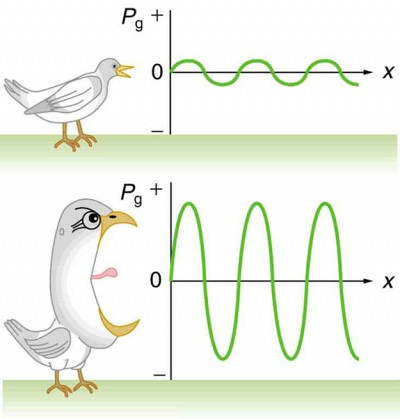

There is a positive correlation between amplitude and loudness, i.e. as the height of the wave increases, the loudness increases.

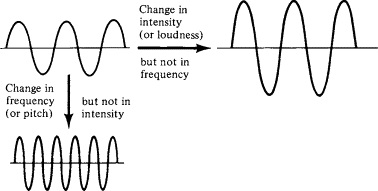

#### Sample Rate (Hz)

Computers do not interpret sound as our ears do, but instead they capture segments of the audio and use them to construct a digital representation of the sound. 

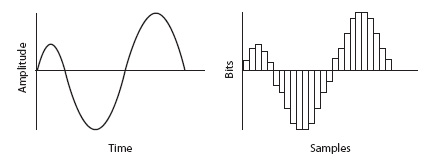

The amount of segments that are present each second is the sample rate. The quality of the audio, or rather how well the original audio is recreated is positively correlated with the sample rate. Higher sample rates mean more capture segments can be used to represent changes in amplitude over time. If the sample rate is low, it is possible that the shape of the wave will not be as true to real life.

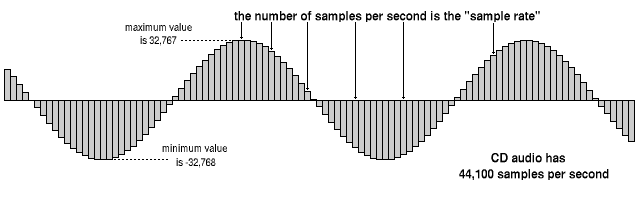

#### Bit depth (bits) / Bit rate (kbps)

Bit depth is a related but distinct concept from sample rate. While Sample Rate captures the temporal element of a sound wave (the horizontal plane), Bit Depth refers to the amount of numbers your computer has to capture the amplitude of the sound (the vertical). Higher Bit Depths mean that there is more capacity to capture more of the amplitude. It also increases the signal-to-noise ratio which increases the dynamic range.  

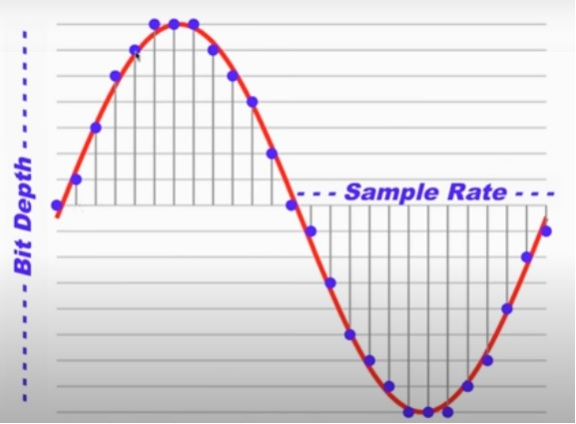


Bit Rate is the amount of data that is being transferred into the audio over time. It is like Sample Rate, but instead we are refering to the bits being transfered each second (the data) rather than how quickly the samples are being refreshed. Generally speaking, higher Bit Rates usually result in better audio quality, but this is not always the case as Bit Rate must be balanced against the Sample rate and Bit Depth.

The most important thing to consider about Bit Rate is the consequent file size that will be produced by the computer. High Bit Rates will result in larger files, so it is important to consider the context of the audio files you are dealing with and balance this with what you are attempting to do with them.



## Import the Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

import librosa
import librosa.display

import IPython.display as ipd


## Playing Audio Files in Jupyter Notebooks with Ipython

To play audio in a jupyter environment, we will use the Ipython library (pip install Ipython).

Here I have loaded in a short test audio file which is me saying hello to you.

In [6]:
ipd.Audio("hello.wav")

The above file is a "wav" file. This is an uncompressed type of audio format, which means that the bit rate remains large and the file size is larger. This 4 second clip is 856 KB in size.

Let's try the same audio but in a different file format.

In [7]:
ipd.Audio("hello.mp3")

The above file is an "mp3" file, which you are probably familiar with. This file is a compressed audio format, meaning the bit rate is shrunk to reduce the file size. The same clip is now 108KB.

Let's try one more.

In [8]:
ipd.Audio("hello.ogg")

The above file is an "ogg" file. Like mp3, it is a compressed audio format. This file is even smaller than the mp3 at just 40kb. 

The take home message is that when you are working with audio, you will encounter files with different types. Ipython can read these and play them back to you in a Jupyter environment.

There are other file types as well that you might encounter, such as FLAC and AIF. AIF is similar to wav in that it is completely uncompressed. FLAC is different in that the file is compressed somewhat, but not enough to lose information. So these files will be somewhat smaller than an uncompressed file, but much larger than a compressed and lossy format such as mp3 and ogg.

Perhaps you would like to try and see whether Ipython can handle these file types yourself?

## Handling raw audio data

Being able to play audio back quickly is helpful for assessing the quality of the data you are dealing with. You can actually check to see if you are analysizing what you are expecting to analyze.

However, we cannot neccessarily work with the audio in this format. 

To work with the data, we will use Librosa to load the file and store it into a variable.

In [9]:
# y is the raw data, and sr is the sample rate
y, sr = librosa.load("hello.wav")

This y variable will output a numpy array representing the audio data as numbers. The length of the array is huge, even just for 4 seconds there are 100,548 values in the array. The sr variable will return an integer value presenting the sample rate.

In [10]:
print(f'y: {y}')
print(f'y.shape: {y.shape}')
print(f'sr: {sr}')


y: [ 0.          0.          0.         ... -0.00015128 -0.00015455
  0.        ]
y.shape: (15617,)
sr: 22050


## Plotting audio data

To create a simple visualization of the sound file, first convert the numpy array into a pandas series and then utilize the in built plot function to visualize the wave. We'll also adjust the line width using lw to make the sound waves easier to see.

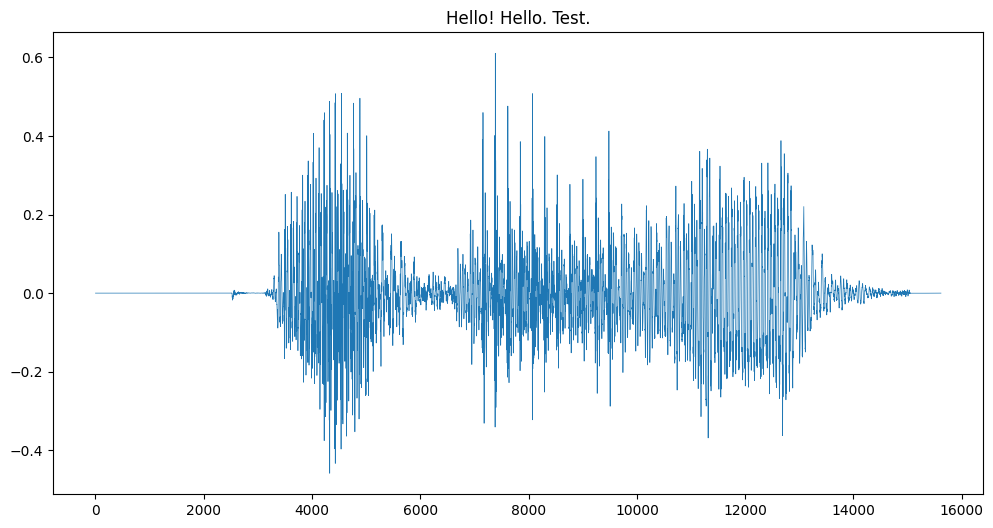

In [11]:
pd.Series(y).plot(figsize=(12,6), lw=0.5, title = "Hello! Hello. Test.")
plt.show()

Notice how there is some silence at the beginning and the end of the file. In fact, you could print the first 100 numbers and they would all be zero.

In [12]:
print(y[:100])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


Librosa can handle this by removing the silences. We will use the effects.trim function to do this. It will output two things, the trimmed numpy array, and the respective indexes of the non-silent region. 

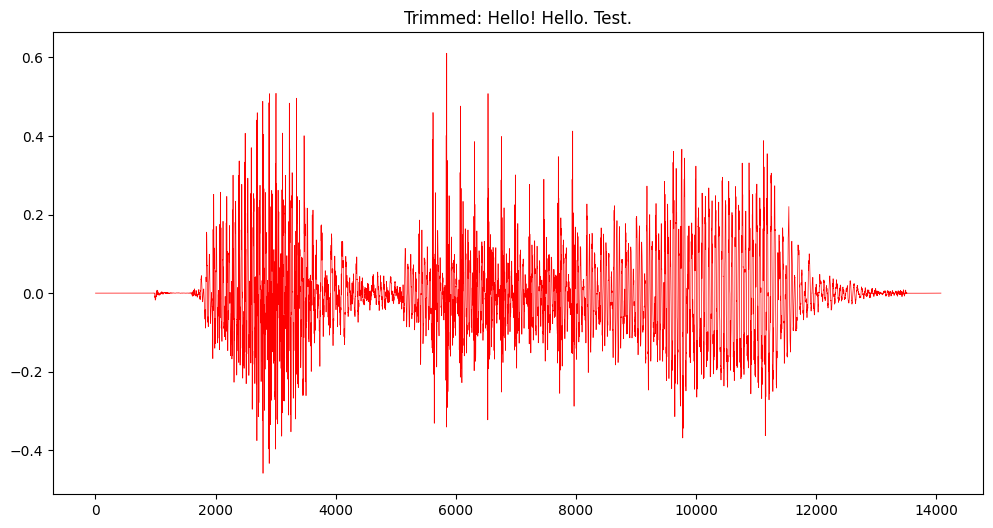

In [13]:
y_trimmed, y_index = librosa.effects.trim(y)

pd.Series(y_trimmed).plot(figsize=(12,6), lw=0.5, title = "Trimmed: Hello! Hello. Test.", color = 'red')
plt.show()


This trimming can be further adjusted by setting a parameter that is used to calculate from what amplitude should trimming occur. This is the top_db and the default settings are 60db. Lets change it to 30db and see what happens.  

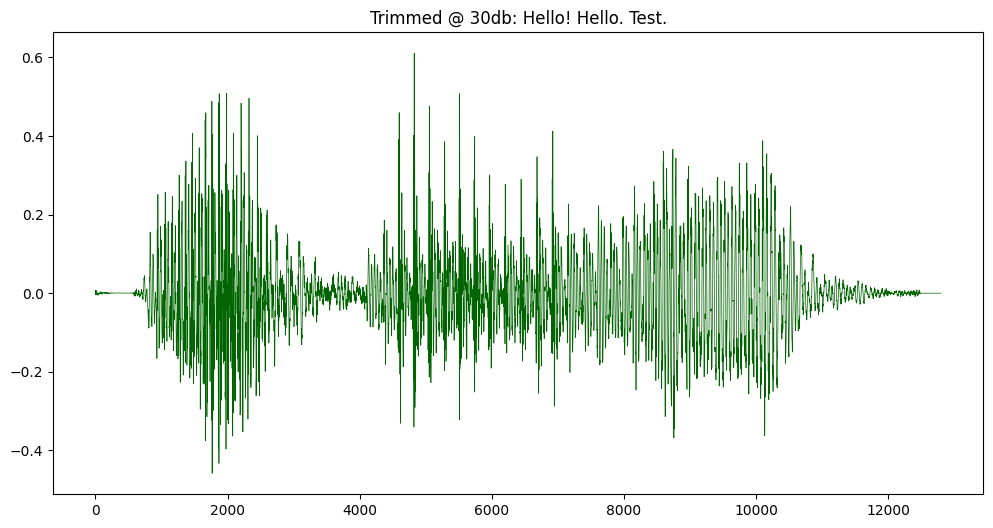

In [14]:
y_trimmed, y_index = librosa.effects.trim(y, top_db=30)

pd.Series(y_trimmed).plot(figsize=(12,6), lw=0.5, title = "Trimmed @ 30db: Hello! Hello. Test.", color = 'darkgreen')
plt.show()

If we want, we can zoom in to see what is happening in say that first "Hello". It is simple enough, we just need to adjust the range of y being passed into the series. Lets go from 0 to 15000

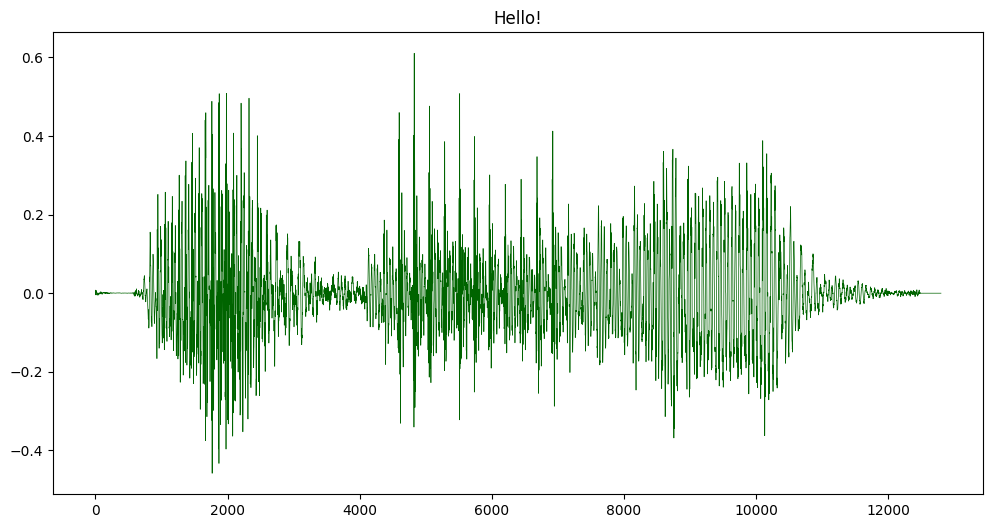

In [15]:
y_trimmed, y_index = librosa.effects.trim(y, top_db=30)

pd.Series(y_trimmed[:15000]).plot(figsize=(12,6), lw=0.5, title = "Hello!", color = 'darkgreen')
plt.show()

## Creating Spectrograms: Applying Fourier Transformations

These visualizations are pretty cool, but there isn't much that we can do with a one dimensional array of numbers. What if we were to add another dimension to the data that captures the intensity (amplitude) along with the frequencies over time? This can be achieved by applying a <strong> Fourier Transformation </strong> to the audio data. This mathematical concept will deconstruct the audio signal such that both the frequency and magnitude are simultaneously captured.

With Librosa we can achieve this by performing a short-time Fourier transform. We can then take the output of the transformation and convert it into decibels. This is done by taking the absolute values of the tranformed D and scaling it relative to the max ref: 20 * log10(S / ref). The amazing thing that occurs after this is we will have some data with the shape (1025, 141) that could be fed into a machine learning algorithm.

In [16]:
# Fourier Transformation
D = librosa.stft(y_trimmed)
# Sound in decibel
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

print(S_db.shape)

(1025, 26)


## Plotting the Spectrogram

A spectrogram is the plot that visualises all the new information that we extracted through the Fourier Transformation.  On the x axis we have time, on the y axis we have the frequency and the colours represent the amplitude. 

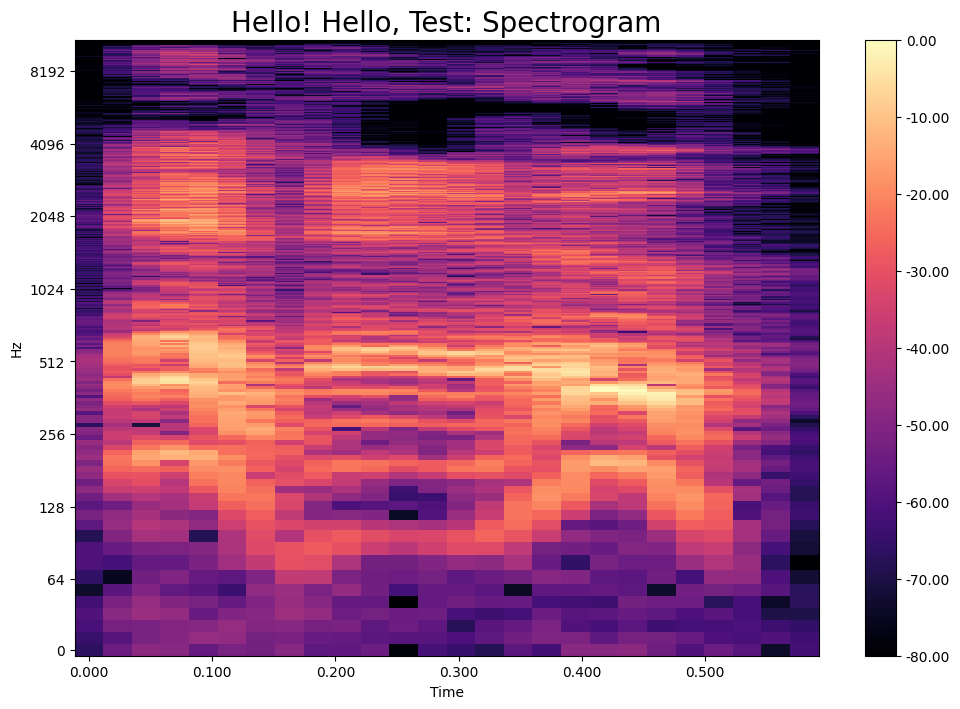

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
img = librosa.display.specshow(S_db, x_axis= 'time', y_axis='log', ax = ax)

ax.set_title("Hello! Hello, Test: Spectrogram", fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')

plt.show()

## Mel-Spectrograms

What are mel-spectrograms? These are basically spectrograms that has been converted to a mel scale. A mel scale (the mel comes from melody) is a perceptual scale of evely spaced pitches that mimics what the human ear perceives. We are effectively attempting to capture the melody element of sound.

We can build one of these with Librosa as well. Instead of performing the Fourier Transformation first, I'll insert the trimmed y straight into the melspectrogram function and pass in the sample rate as well. I will also pass a parameter n_mels which is the number of melodies. As a result, we will have an array with the shape of (512, 141), with 512 being the number of mels added into the function.

We then convert the output into decibels and plot it as we did before.

S.shape: (512, 26)


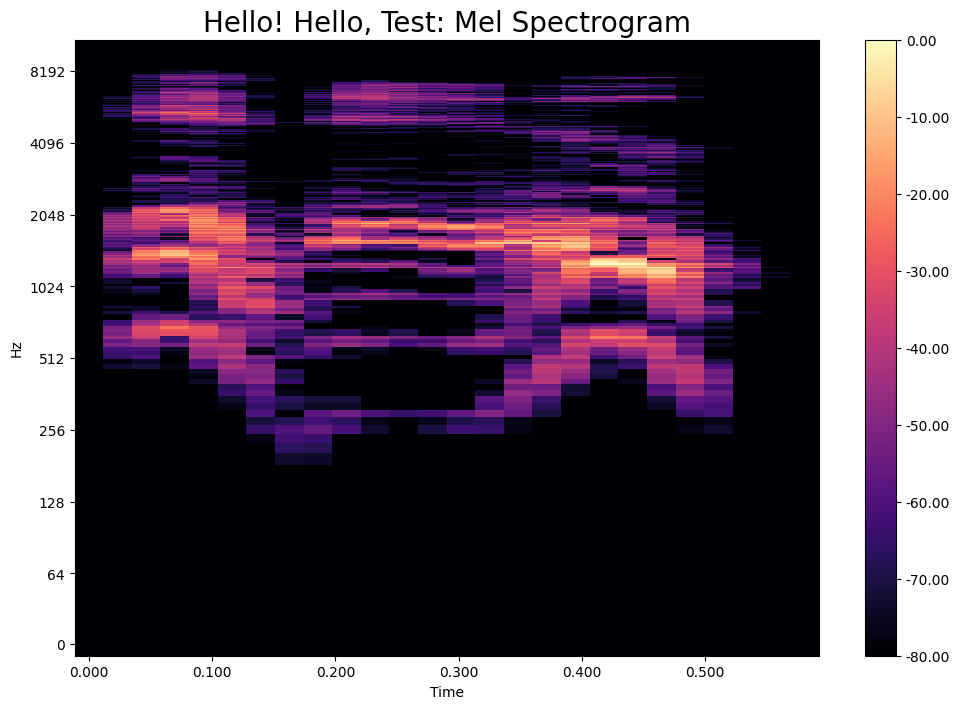

In [18]:
S = librosa.feature.melspectrogram(y=y_trimmed, sr=sr, n_mels=512,)

print(f'S.shape: {S.shape}')

S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

# Plot the mel-spectrogram

fig, ax = plt.subplots(figsize=(12,8))
img = librosa.display.specshow(S_db_mel, x_axis= 'time', y_axis='log', ax = ax)

ax.set_title("Hello! Hello, Test: Mel Spectrogram", fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')

plt.show()



This time more prominent parts of the speech are more obvious if you compare it to the previous spectrogram.